# Part1. Facebook network


#   1.Structural properties of the facebook network


# Question 1

In [2]:
if (!require('igraph')) install.packages('igraph')
library('igraph')

[1] "Is connected = TRUE"
[1] "Number of edges = 88234"
[1] "Number of vertices = 4039"


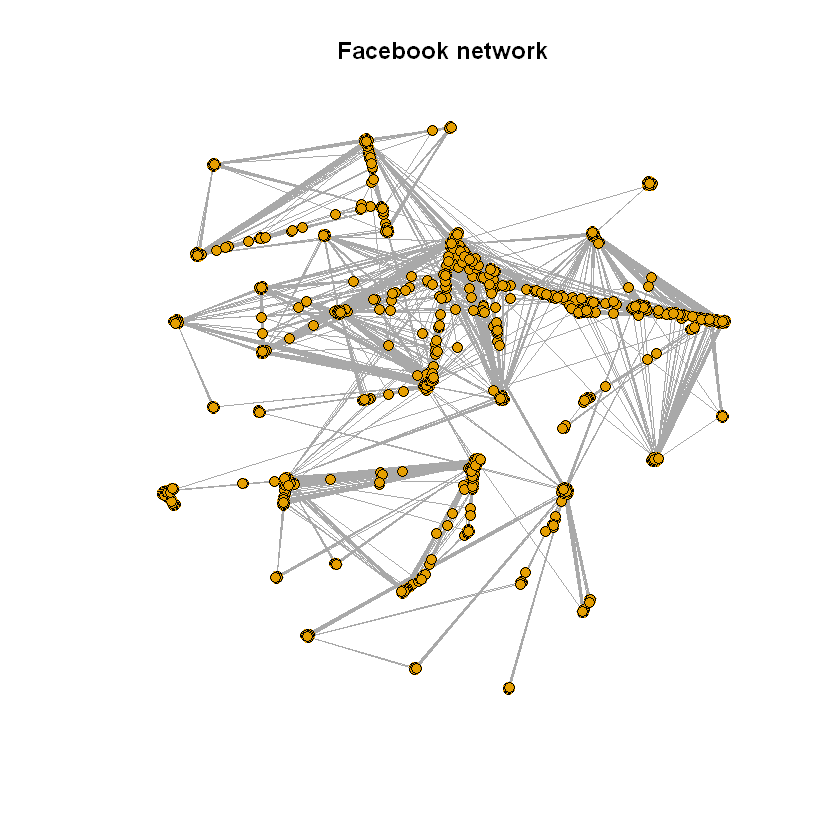

In [3]:
facebook_graph <- read.graph("facebook_combined.txt", format="edgelist", directed=FALSE)
plot(facebook_graph, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Facebook network")

print(paste("Is connected =", is.connected(facebook_graph)))
print(paste("Number of edges =", gsize(facebook_graph)))
print(paste("Number of vertices =", gorder(facebook_graph)))


# Question 2

In [4]:
print(paste("The diameter of the network =", diameter(facebook_graph, directed = F)))

[1] "The diameter of the network = 8"


# Question 3

[1] 43.69101

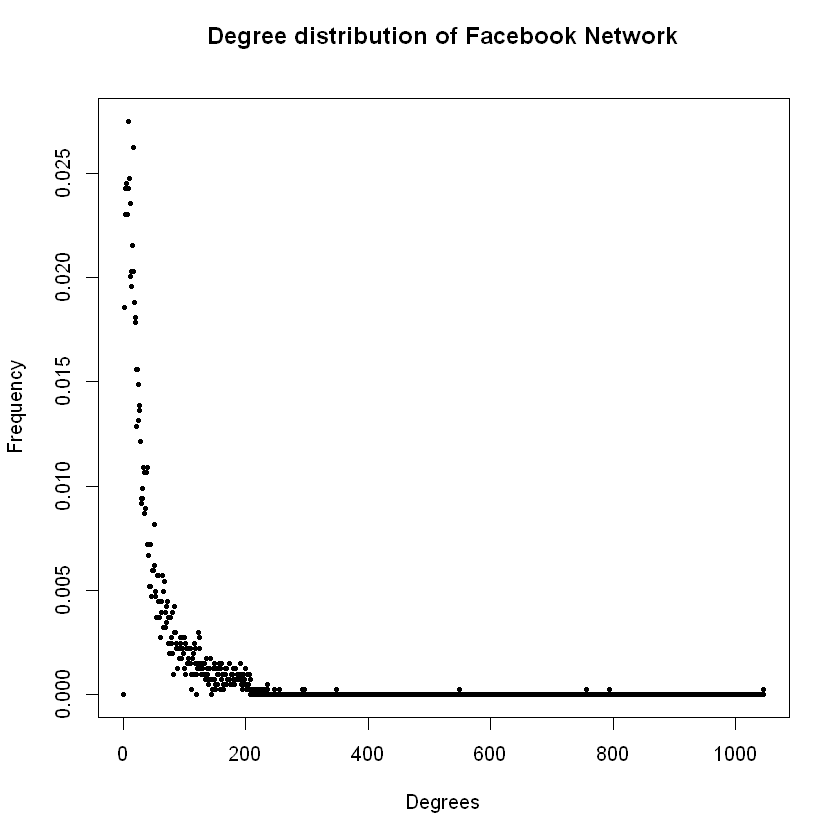

In [5]:
degree_dis = degree.distribution(facebook_graph)
plot(degree_dis,main="Degree distribution of Facebook Network
     ",xlab="Degrees",ylab="Frequency", pch=16, cex=0.5)
mean(degree(facebook_graph)) 

# Question 4

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"819 y values <= 0 omitted from logarithmic plot"


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
    -0.8204      -1.2279  



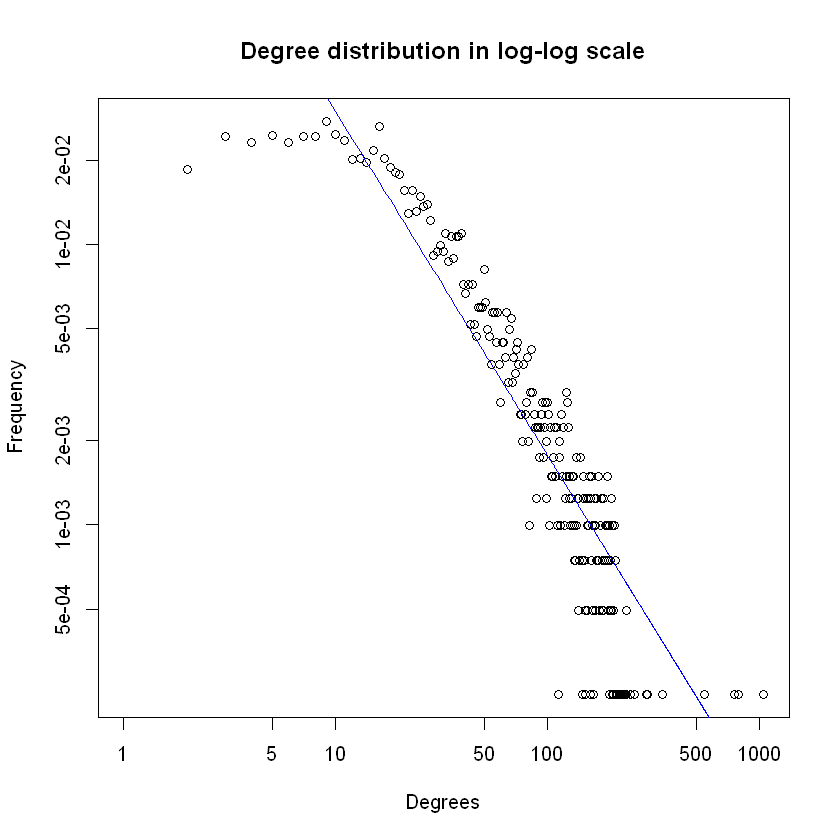

In [6]:
plot(degree_dis, log="xy", main="Degree distribution in log-log scale",xlab="Degrees",ylab="Frequency")

log_degree = log(seq(1:max(degree(facebook_graph))))
log_distribution = log(degree_dis)[-1]
log_distribution = log_distribution[log_distribution != -Inf]
valid_index = which(!(log_distribution %in% c(-Inf)))
log_degree = log_degree[valid_index]

print(lm(log_distribution~log_degree))
x1 <- seq(1,1000,by=1)
y1 <- x1^(-1.227) * (10)^(-0.3)
lines(x1, y1, col = 'blue')

# 2. Personalized network

# Question 5

[1] "The number of nodes = 348"
[1] "The number of edges = 2866"


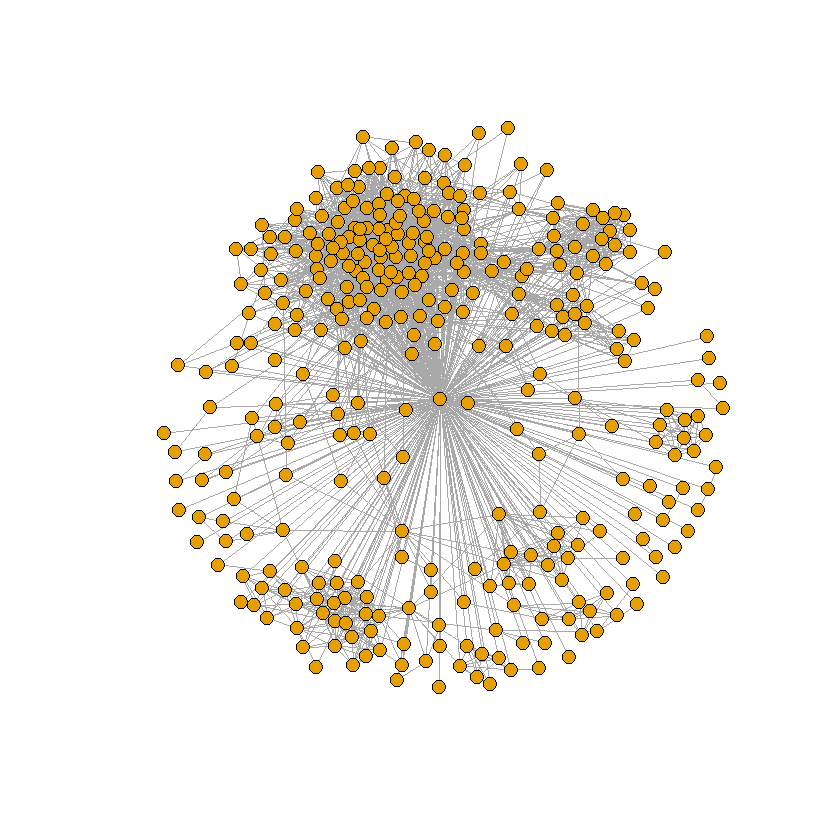

In [7]:
gcc_1 <- induced_subgraph(facebook_graph, c(1, neighbors(facebook_graph,1)))
plot(gcc_1, edge.arrow.size=.1, vertex.size=5, vertex.label=NA)
print(paste("The number of nodes =",vcount(gcc_1)));
print(paste("The number of edges =",ecount(gcc_1)));

# Question 6

In [8]:
print(paste("diameter of the personalized network =", diameter(gcc_1)));

[1] "diameter of the personalized network = 2"


# 3. Core node’s personalized network

# Question 8

In [9]:
core_Ind <- which(neighborhood.size(facebook_graph, 1, nodes=V(facebook_graph))>201) # 201 since we want to exclude itself
print(paste("The number of core nodes =", length(core_Ind)));
print(paste("The average degree of core nobes =", mean(degree(facebook_graph, v=V(facebook_graph)[core_Ind]))));

[1] "The number of core nodes = 40"
[1] "The average degree of core nobes = 279.375"


# 3.1. Community structure of core node’s personalized network

# Question 9

[1] "Node ID: 1"
[1] "Fast-Greedy: 0.413101372834235"
[1] "Edge-Betweenness: 0.353302172546335"


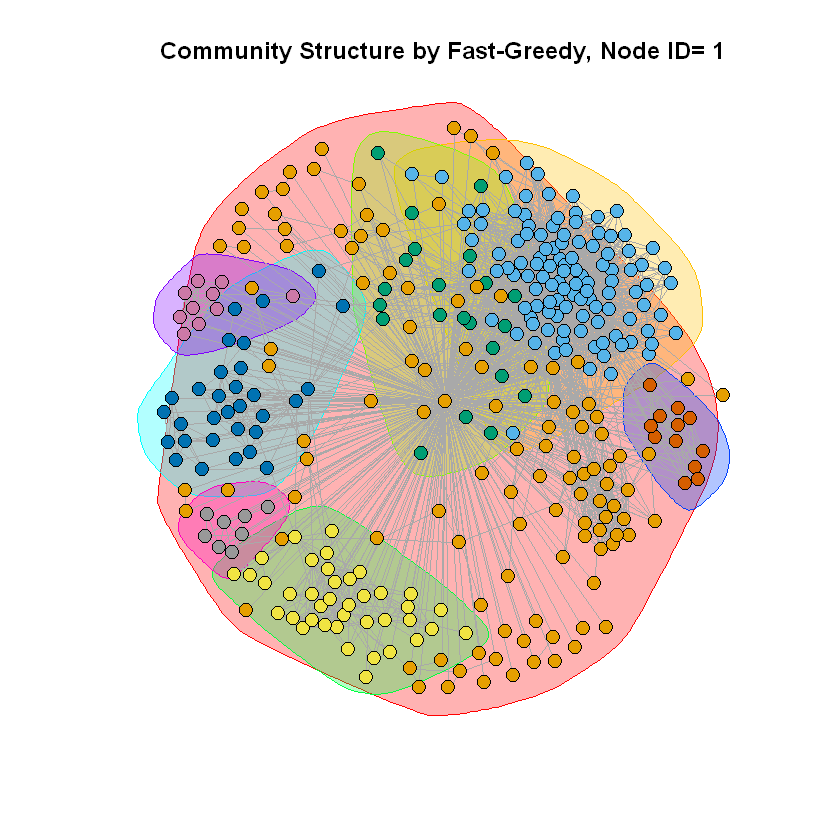

[1] "Infomap: 0.389118471050977"


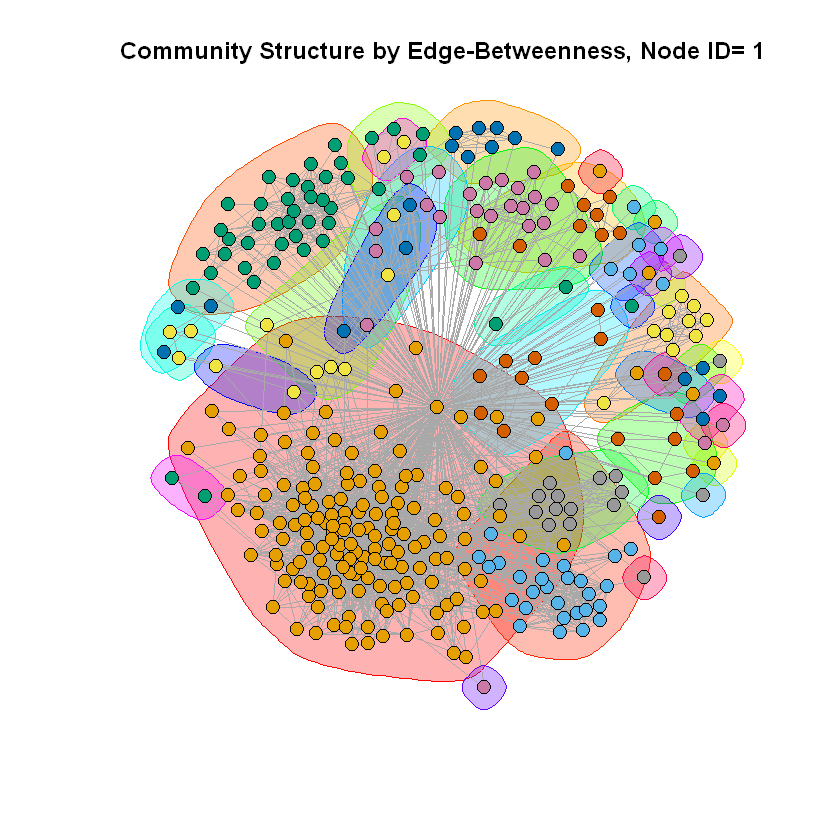

[1] "Node ID: 108"
[1] "Fast-Greedy: 0.435929376026475"


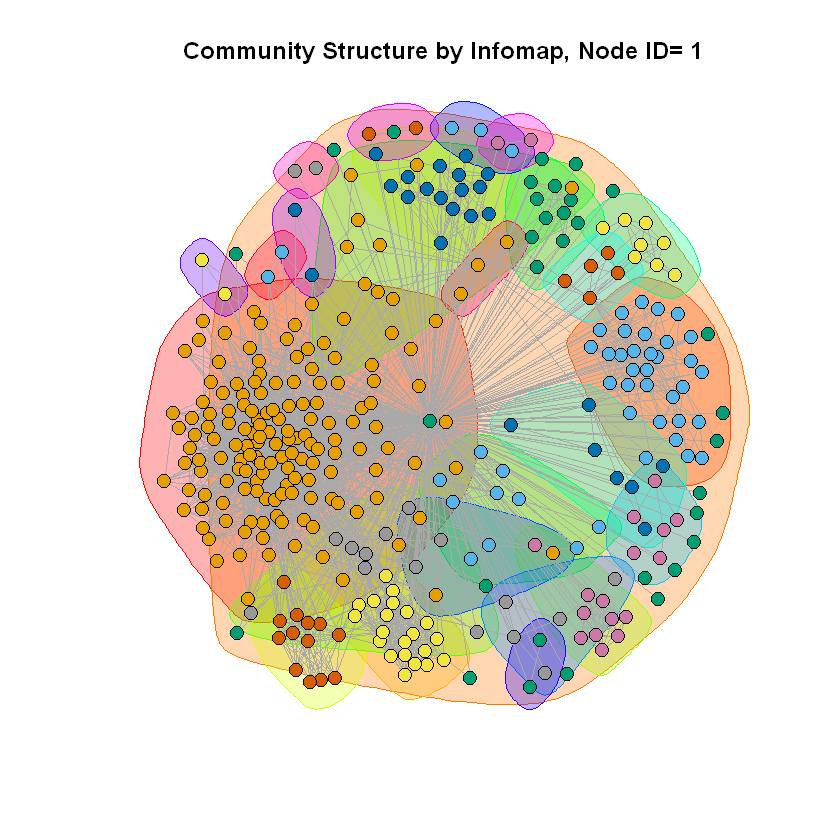

[1] "Edge-Betweenness: 0.506754916538902"


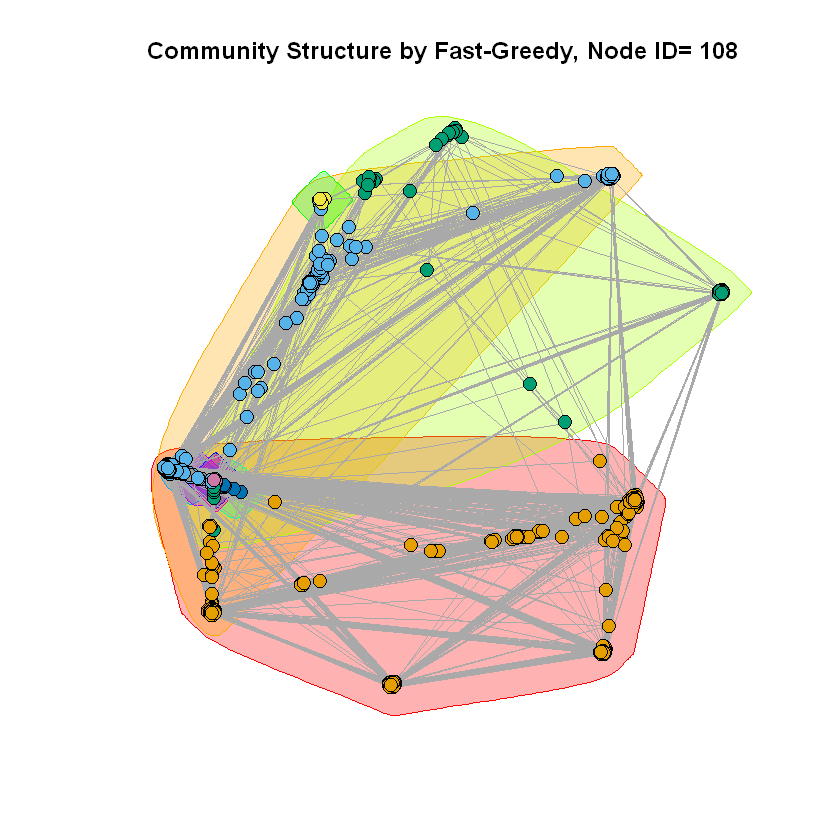

[1] "Infomap: 0.508249171320581"


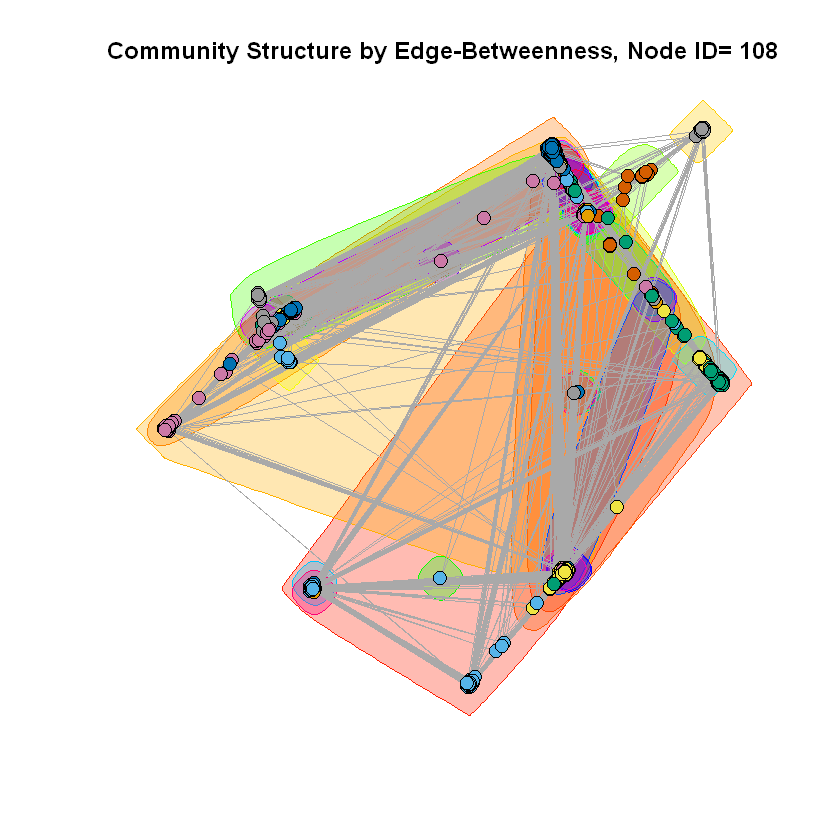

[1] "Node ID: 349"
[1] "Fast-Greedy: 0.251714858543331"


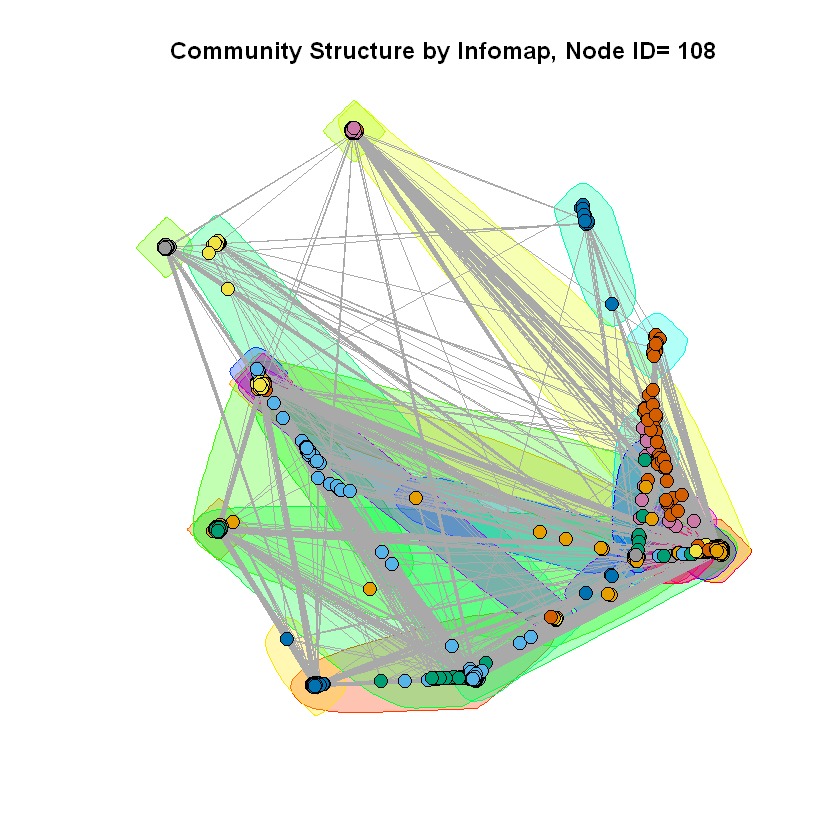

[1] "Edge-Betweenness: 0.133528021370078"


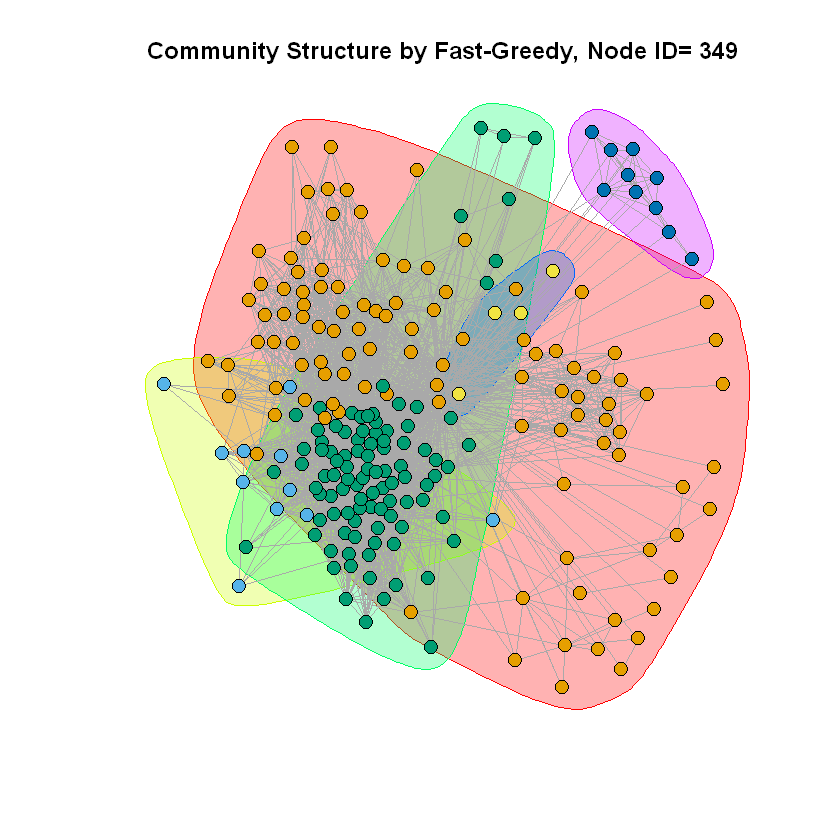

[1] "Infomap: 0.0954641960913581"


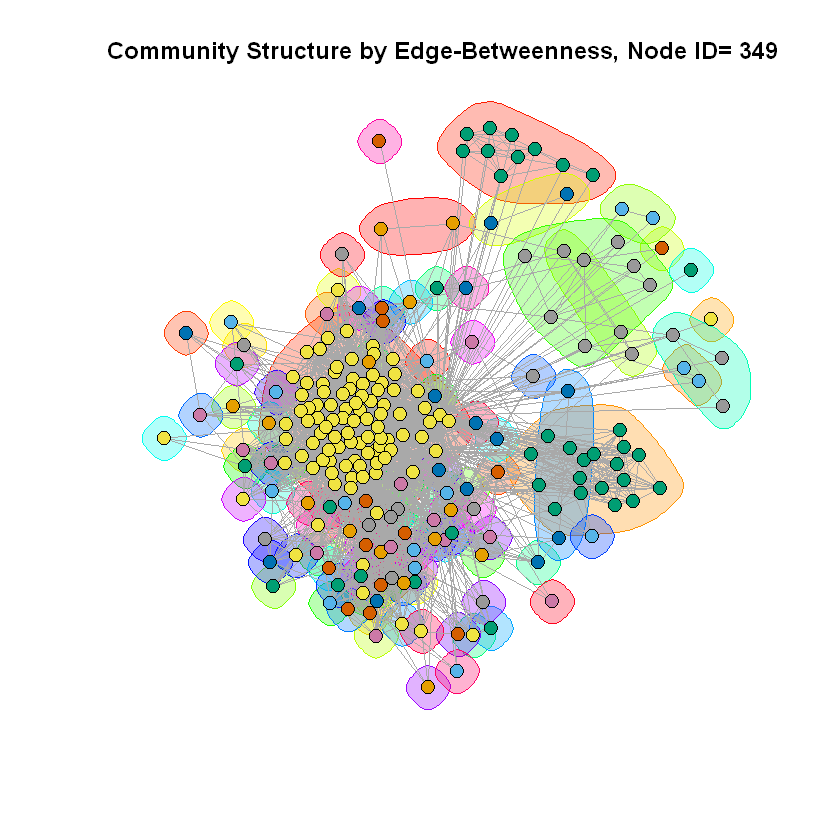

[1] "Node ID: 484"
[1] "Fast-Greedy: 0.507001642196514"


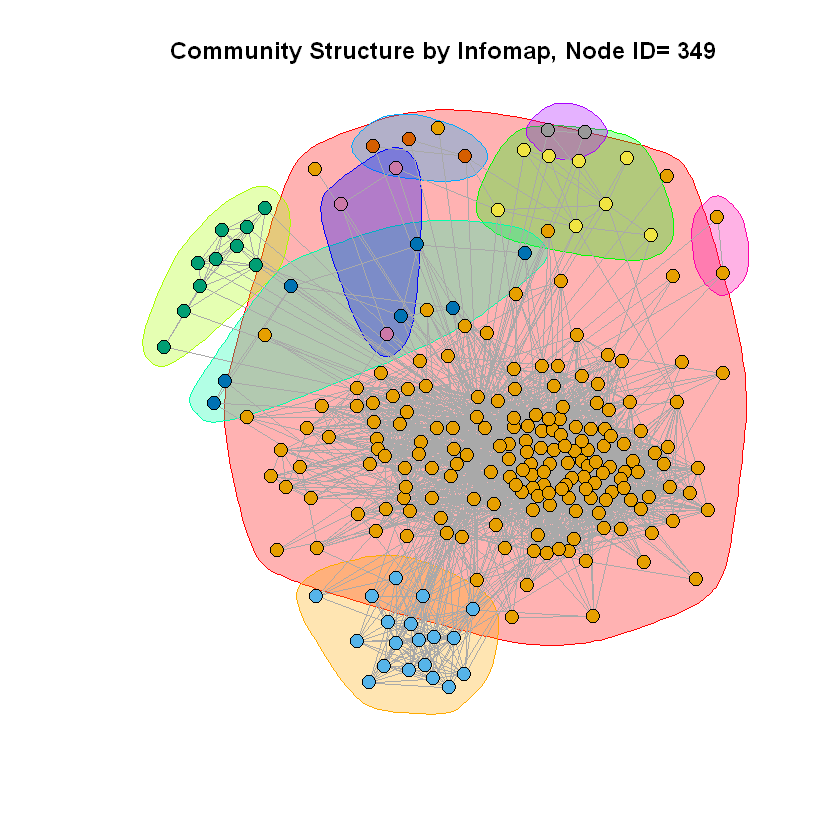

[1] "Edge-Betweenness: 0.489095180244803"


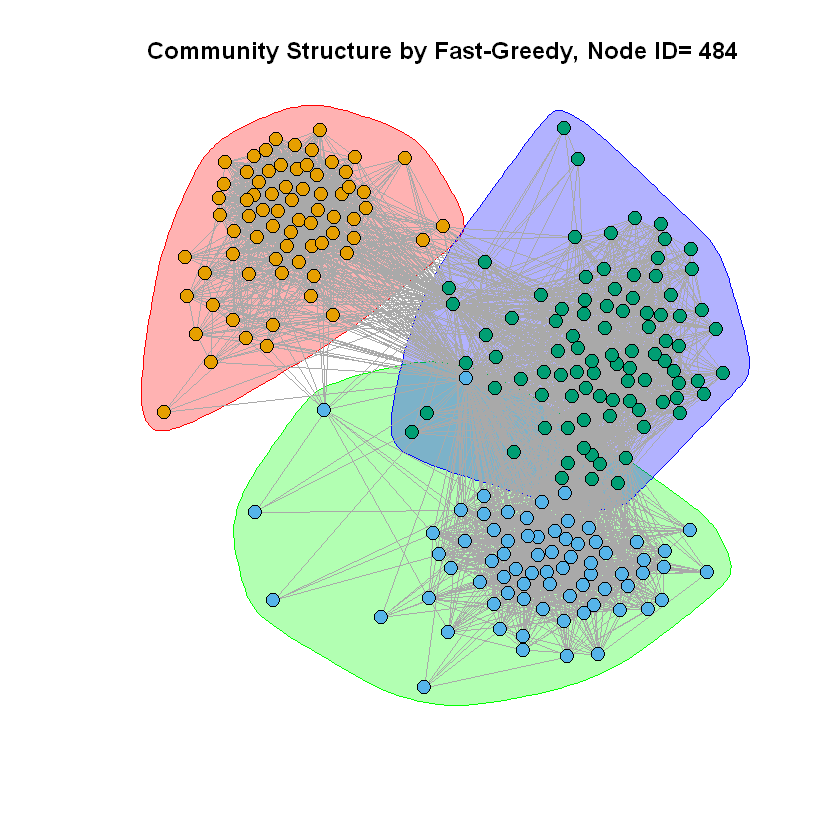

[1] "Infomap: 0.515278752174842"


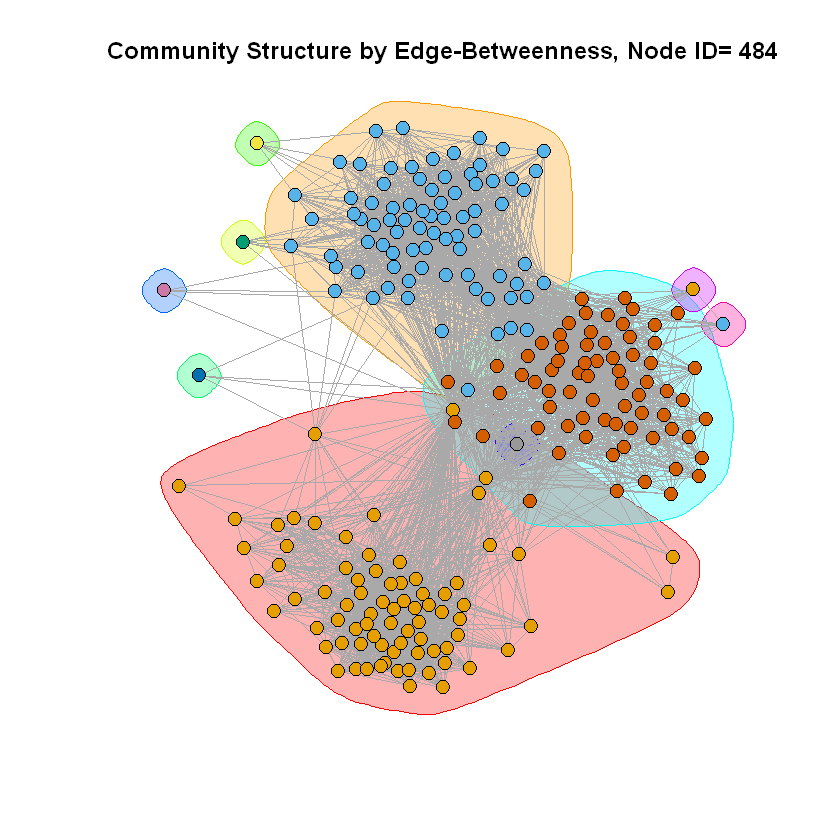

[1] "Node ID: 1087"
[1] "Fast-Greedy: 0.145531499565493"


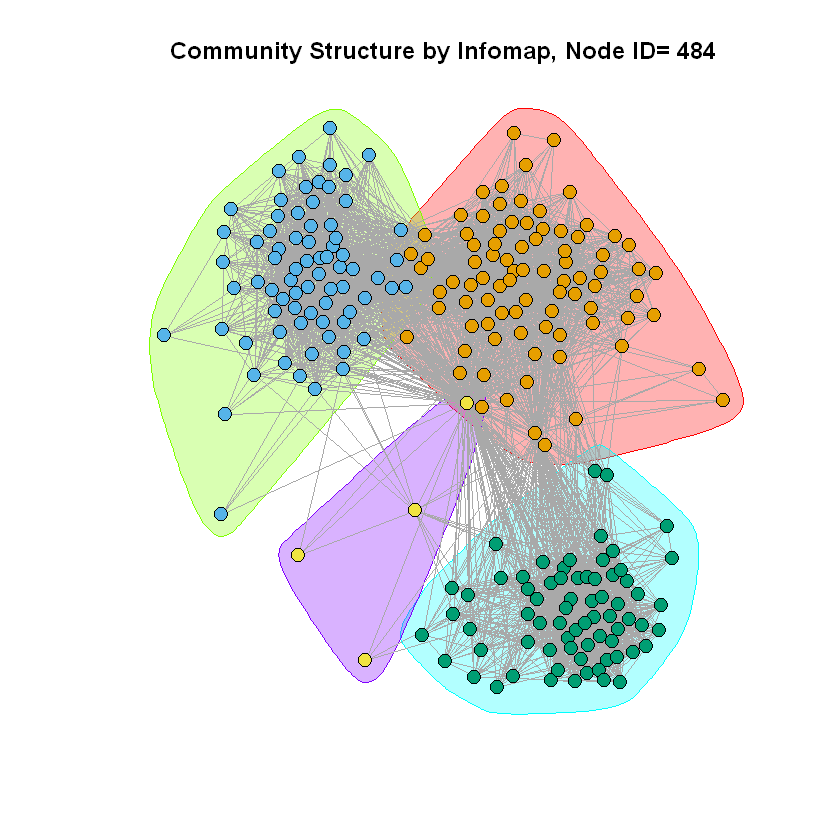

[1] "Edge-Betweenness: 0.027623772388464"


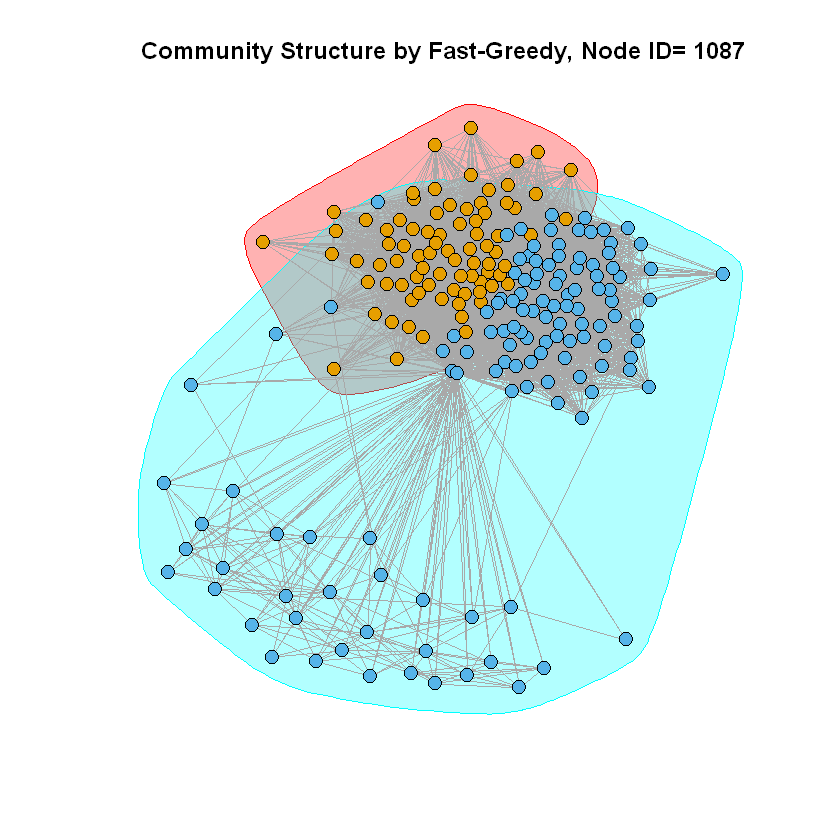

[1] "Infomap: 0.0269066172233357"


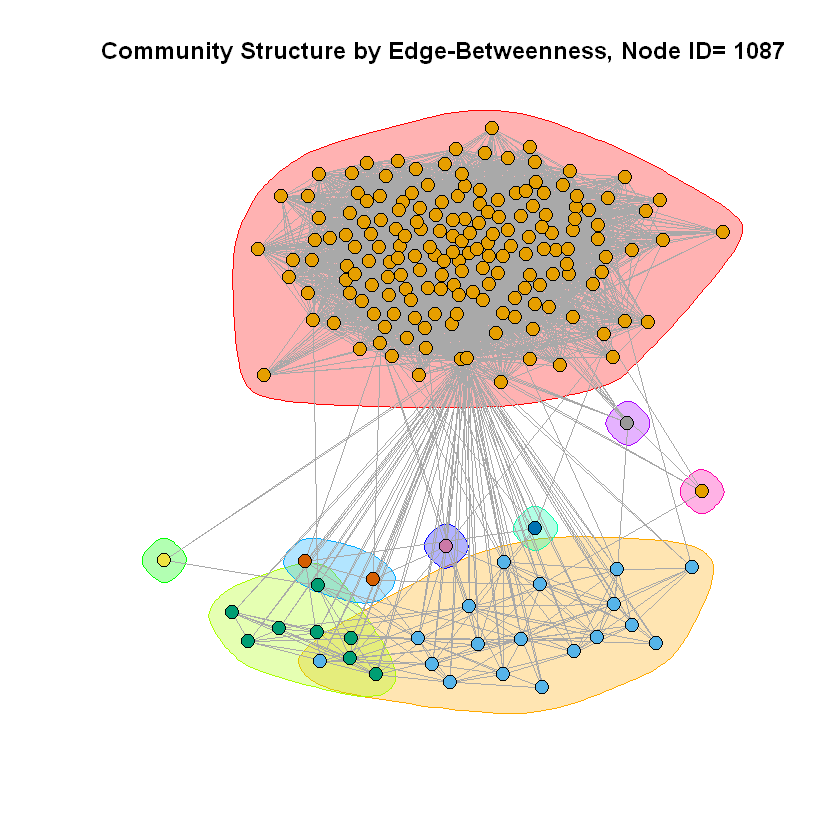

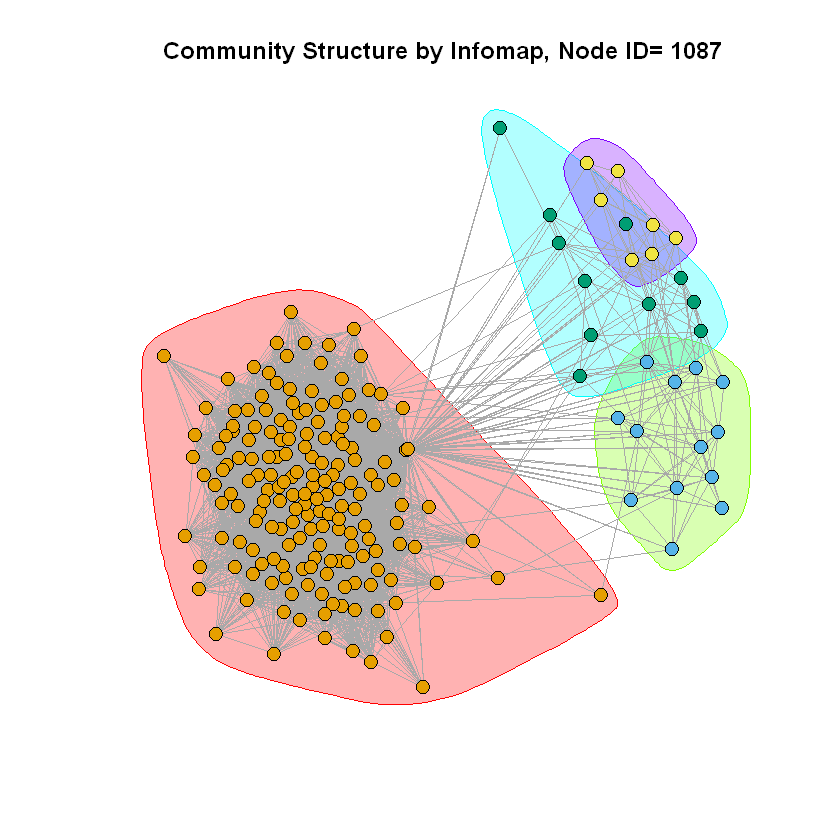

In [9]:
ids <- c(1,108,349,484,1087)
pnetworks <- make_ego_graph(facebook_graph, 1, nodes=V(facebook_graph)[ids])
# print(pnetworks)
for (i in 1:5) {
    print(paste("Node ID:", ids[i]))
    
    # 1 Fast-Greedy
    fc <- cluster_fast_greedy(pnetworks[[i]])
    print(paste("Fast-Greedy:", modularity(fc)))
    # plot community structure
    fc_node_color <- fc$membership
    plot(pnetworks[[i]], mark.groups=groups(fc), edge.arrow.size=.5, 
         vertex.color=fc_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure by Fast-Greedy, Node ID=",ids[i],collapse=""))
    
    # 2 Edge-Betweenness
    ec <- cluster_edge_betweenness(pnetworks[[i]])
    print(paste("Edge-Betweenness:", modularity(ec)))
    # plot community structure
    ec_node_color <- ec$membership 
    plot(pnetworks[[i]], mark.groups=groups(ec), edge.arrow.size=.5, 
     vertex.color=ec_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure by Edge-Betweenness, Node ID=",ids[i],collapse=""))
    
    # 3 Infomap
    ic <- cluster_infomap(pnetworks[[i]])
    print(paste("Infomap:", modularity(ic)))
    # plot community structure
    ic_node_color <- ic$membership 
    plot(pnetworks[[i]], mark.groups=groups(ic), edge.arrow.size=.5, 
     vertex.color=ic_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure by Infomap, Node ID=",ids[i],collapse=""))
}

 # 3.2. Community structure of core node removed

# Question 10

[1] "Node ID: 1"
[1] "Fast-Greedy: 0.44185326886839"
[1] "Edge-Betweenness: 0.41614614203983"


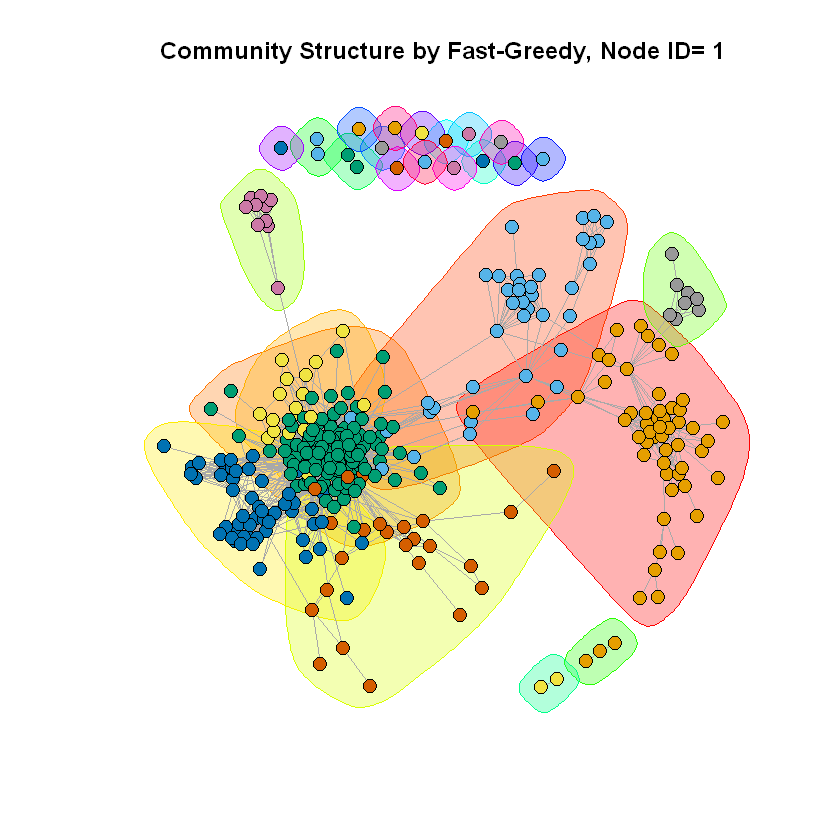

[1] "Infomap: 0.418007659453891"


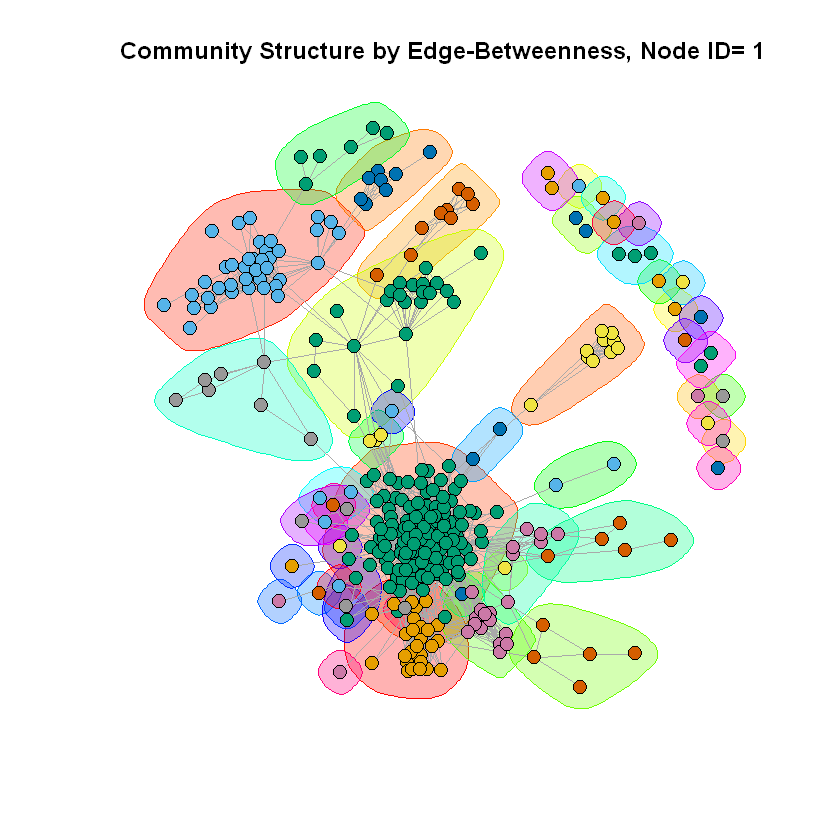

[1] "Node ID: 108"
[1] "Fast-Greedy: 0.458127093719977"


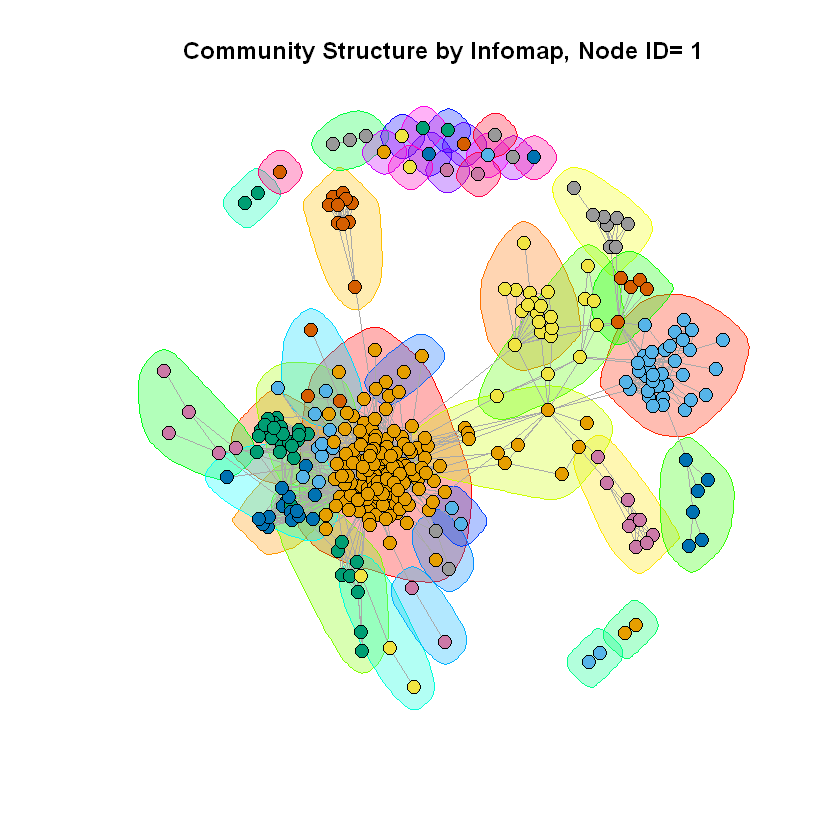

[1] "Edge-Betweenness: 0.521321576382217"


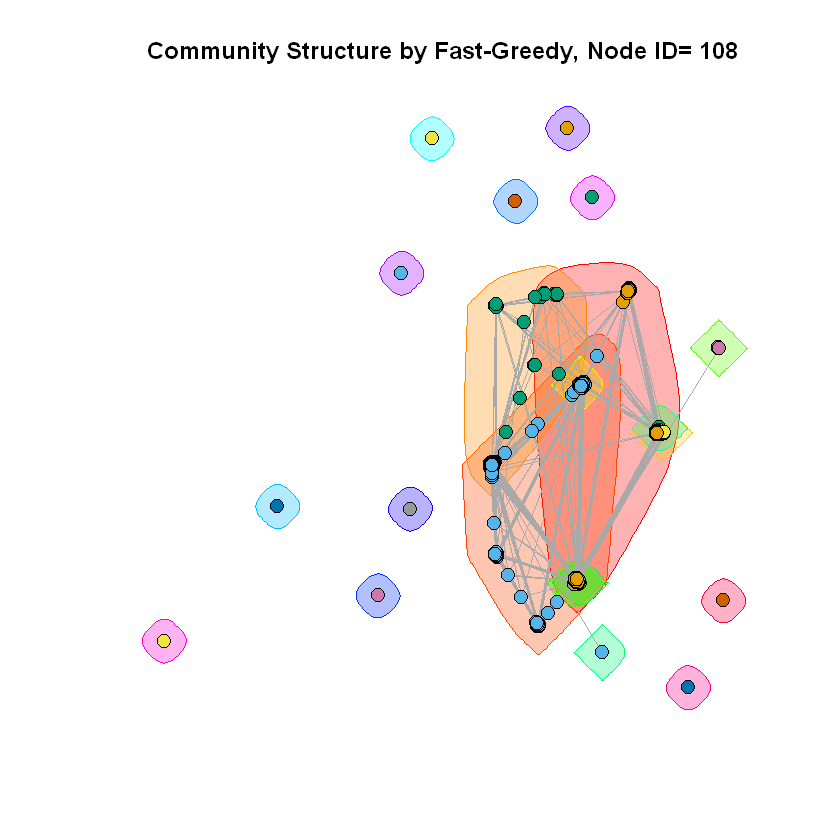

[1] "Infomap: 0.520517122543454"


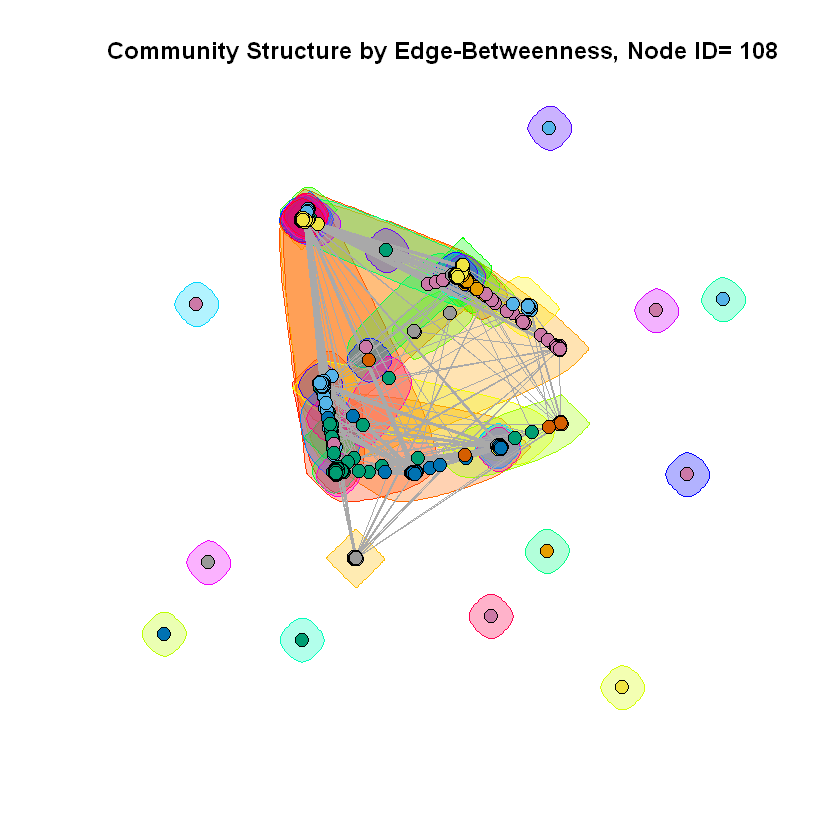

[1] "Node ID: 349"
[1] "Fast-Greedy: 0.245691795942674"


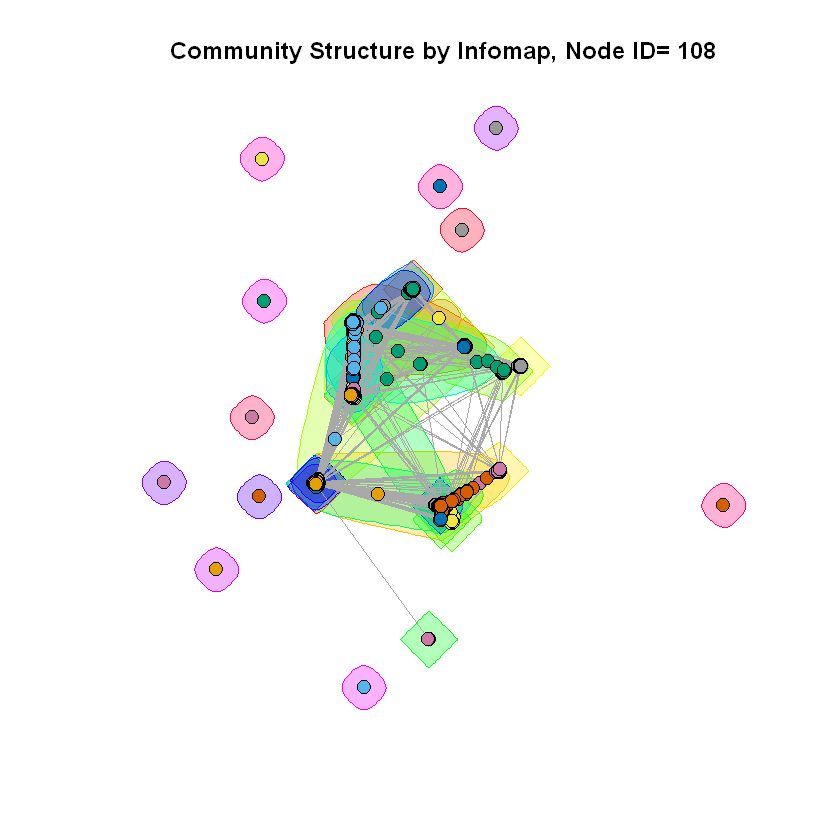

[1] "Edge-Betweenness: 0.150566340187559"


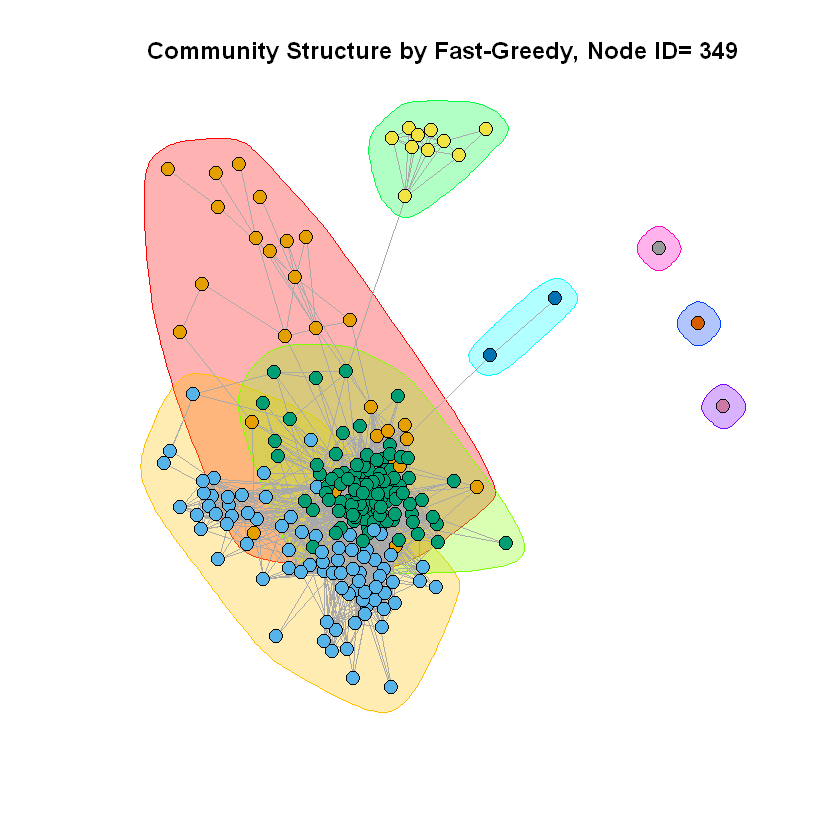

[1] "Infomap: 0.244815615942085"


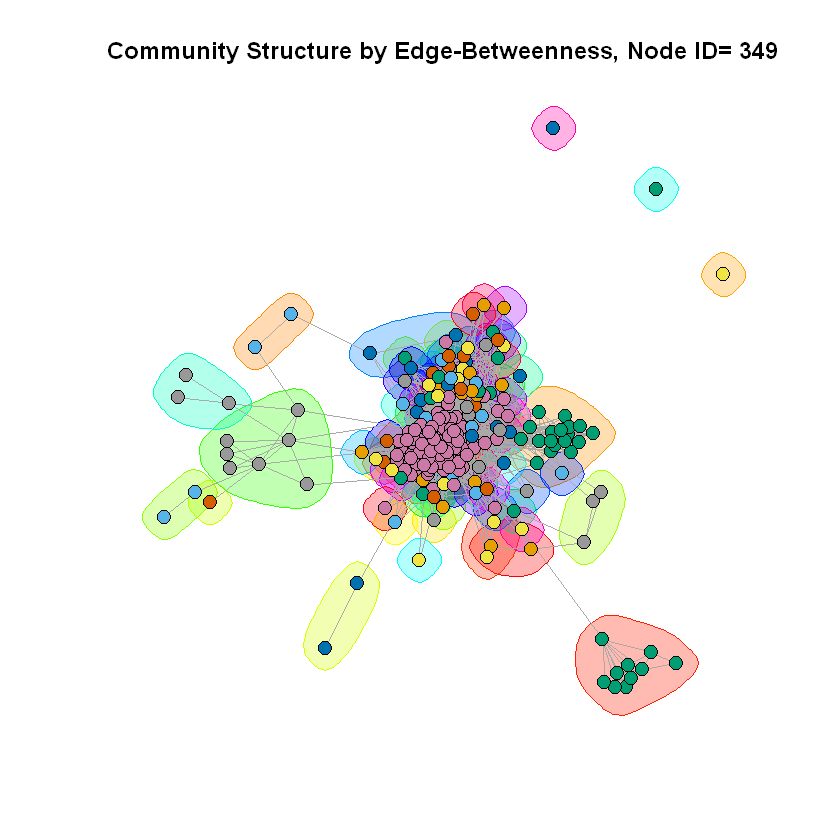

[1] "Node ID: 484"
[1] "Fast-Greedy: 0.534214154606172"


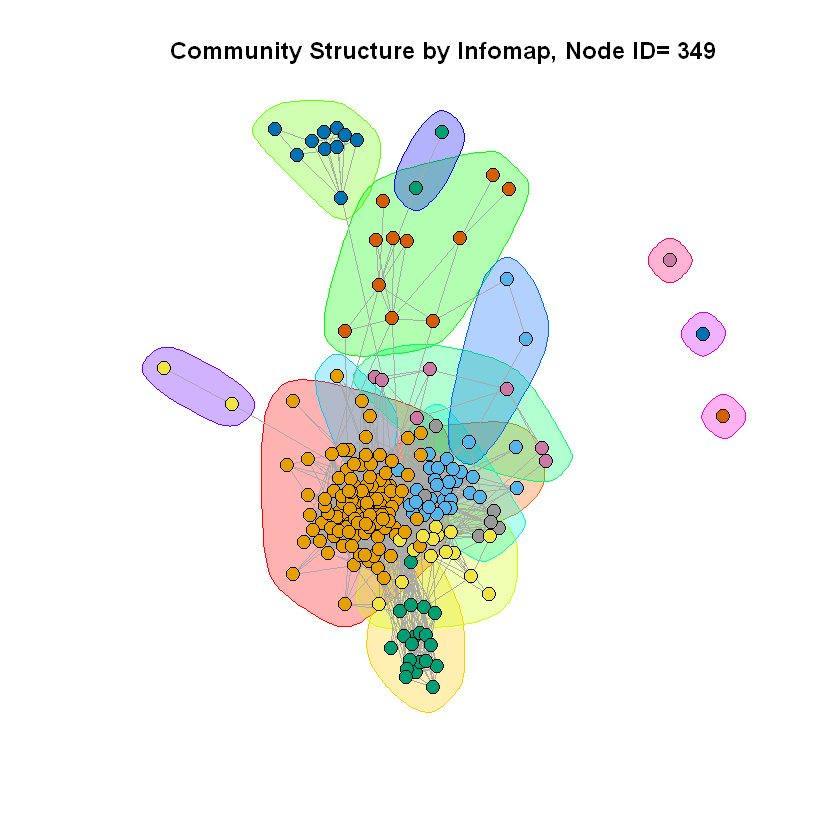

[1] "Edge-Betweenness: 0.515441277123504"


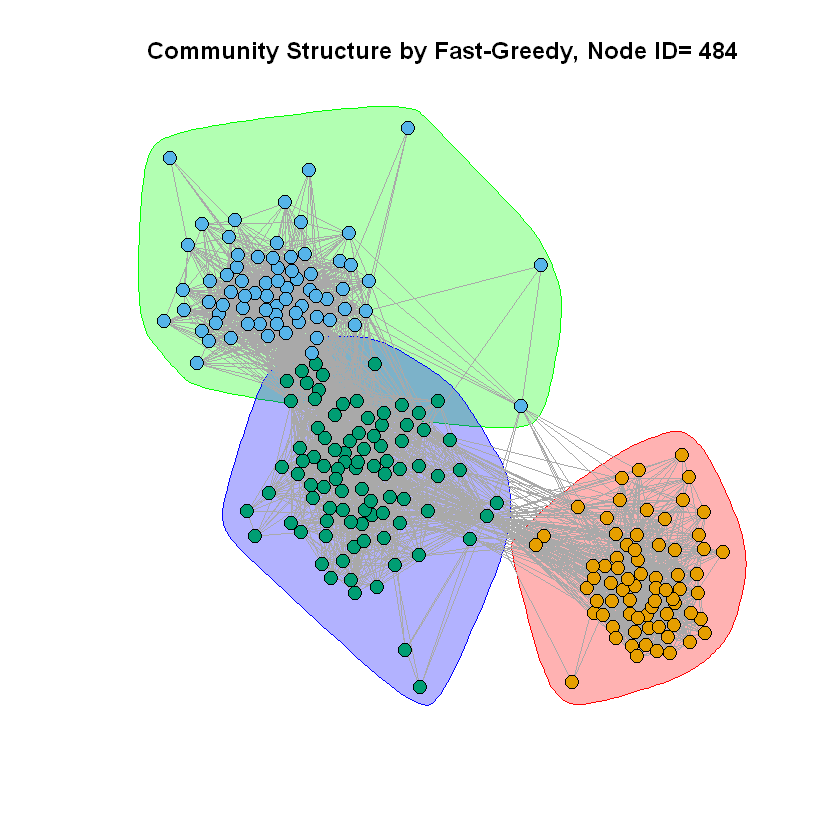

[1] "Infomap: 0.543443679279522"


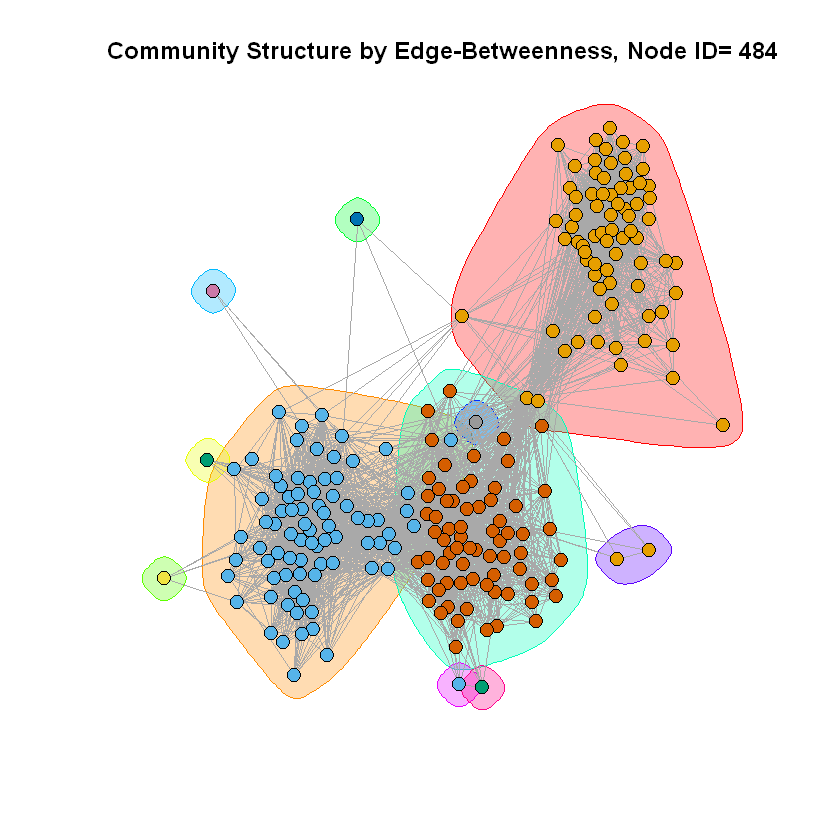

[1] "Node ID: 1087"
[1] "Fast-Greedy: 0.148195631953499"


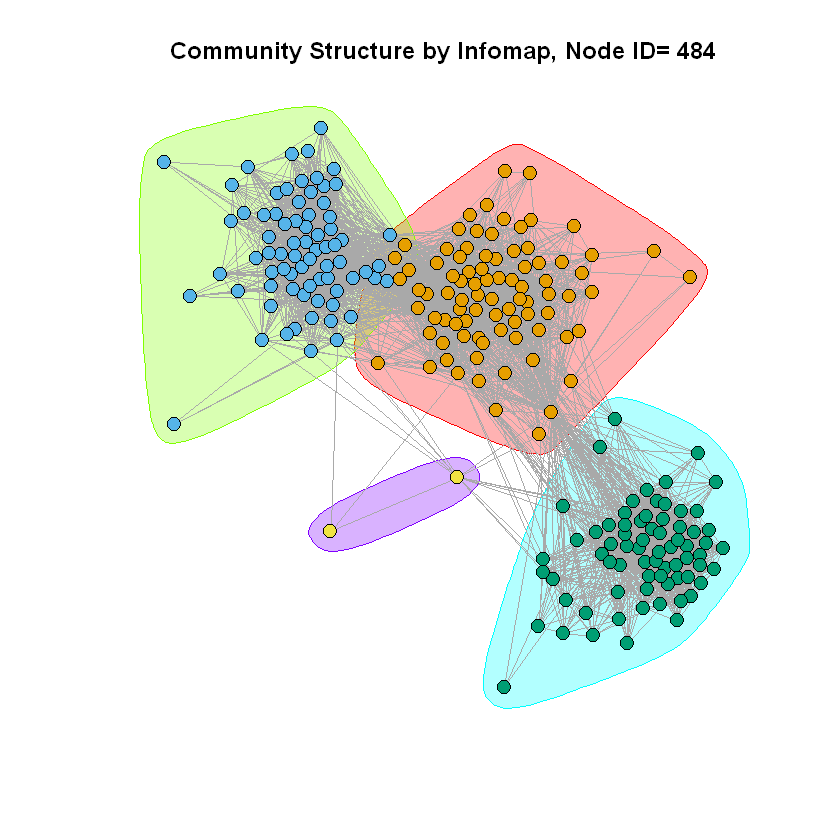

[1] "Edge-Betweenness: 0.0324952980499142"


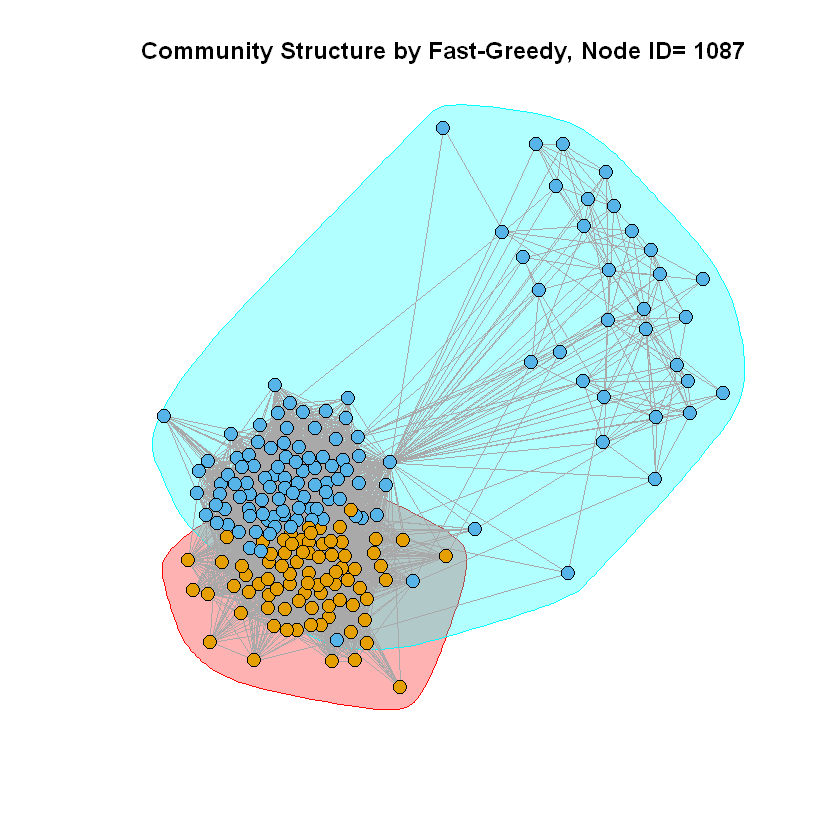

[1] "Infomap: 0.0273715944871148"


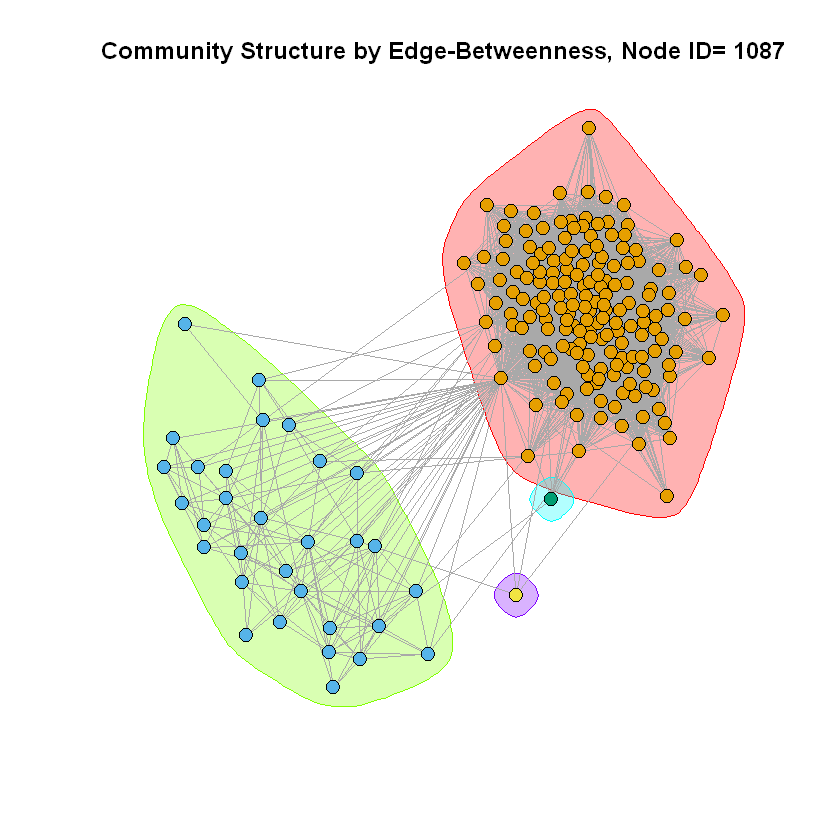

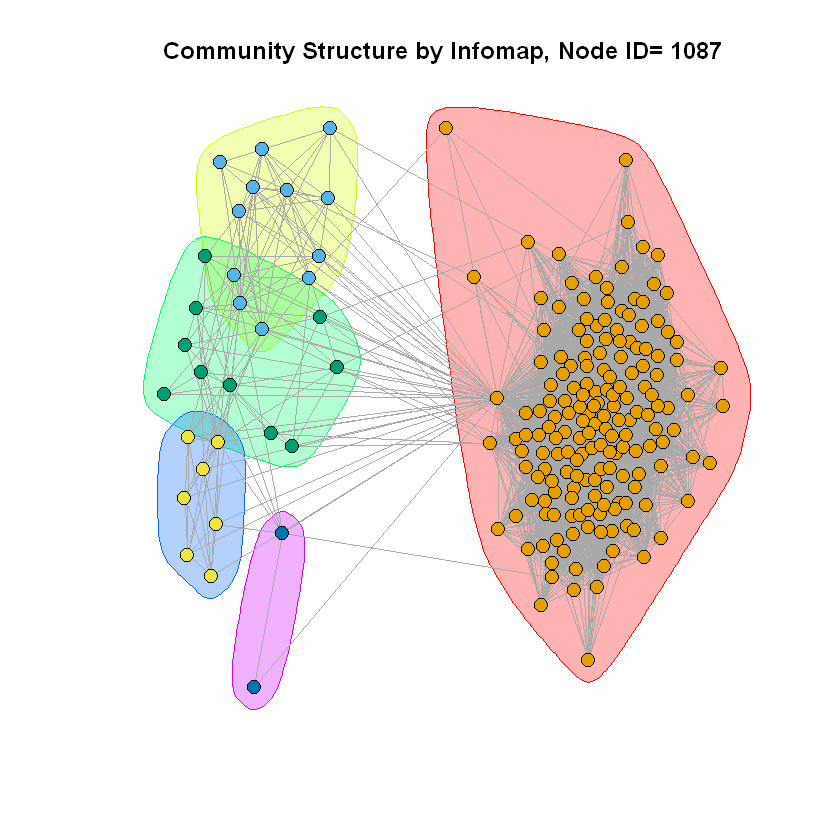

In [10]:
# ids <- c(1,108,349,484,1087)
for (i in 1:5) {
    pnetworks_10 <- induced_subgraph(facebook_graph, neighbors(facebook_graph, ids[i]))
    print(paste("Node ID:", ids[i]))
    
    # 1 Fast-Greedy
    fc <- cluster_fast_greedy(pnetworks_10)
    print(paste("Fast-Greedy:", modularity(fc)))
    # plot community structure
    fc_node_color <- fc$membership
    plot(pnetworks_10, mark.groups=groups(fc), edge.arrow.size=.5, 
         vertex.color=fc_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure by Fast-Greedy, Node ID=",ids[i],collapse=""))
    
    # 2 Edge-Betweenness
    ec <- cluster_edge_betweenness(pnetworks_10)
    print(paste("Edge-Betweenness:", modularity(ec)))
    # plot community structure
    ec_node_color <- ec$membership 
    plot(pnetworks_10, mark.groups=groups(ec), edge.arrow.size=.5, 
     vertex.color=ec_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure by Edge-Betweenness, Node ID=",ids[i],collapse=""))
    
    # 3 Infomap
    ic <- cluster_infomap(pnetworks_10)
    print(paste("Infomap:", modularity(ic)))
    # plot community structure
    ic_node_color <- ic$membership 
    plot(pnetworks_10, mark.groups=groups(ic), edge.arrow.size=.5, 
     vertex.color=ic_node_color, vertex.size=5, vertex.label="", 
    main=paste("Community Structure by Infomap, Node ID=",ids[i],collapse=""))
}